
# Data obtaining

Airline On-Time Performance Data were downloaded from the TranStats website: http://www.transtats.bts.gov/Fields.asp?Table_ID=236

Data were provided by month, so need to consolidate into a single csv file.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in monthly data for year 2015
data = pd.read_csv('../On_Time_On_Time_Performance_2015/On_Time_On_Time_Performance_2015.csv', low_memory=False)

# Convert 'FlightDate' column into pandas datetime object
data['FlightDate'] = pd.to_datetime(data['FlightDate'])

# Keep useful columns of interest and drop the rest
col = [ 'FlightDate', 'UniqueCarrier', 'Origin', 'OriginCityName', 'OriginState', 'Dest', \
        'DestCityName', 'DestState', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', \
        'DepDel15', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', \
        'Cancelled', 'CancellationCode', 'Distance', 'CarrierDelay', \
        'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
    
month_data = data[col]

# consolidate monthly data to a single csv file
month_data.to_csv('ontime_performance2015.csv', mode='a', header=False, index=False)

Now that I have yearly on-time performance data from 2015/01 to 2015/12, let's read in data from the consolidated csv file instead. 

In [1]:
import pandas as pd
data2015 = pd.read_csv('ontime_performance2015.csv', low_memory=False)

# Data exploration

<IPython.core.display.Javascript object>


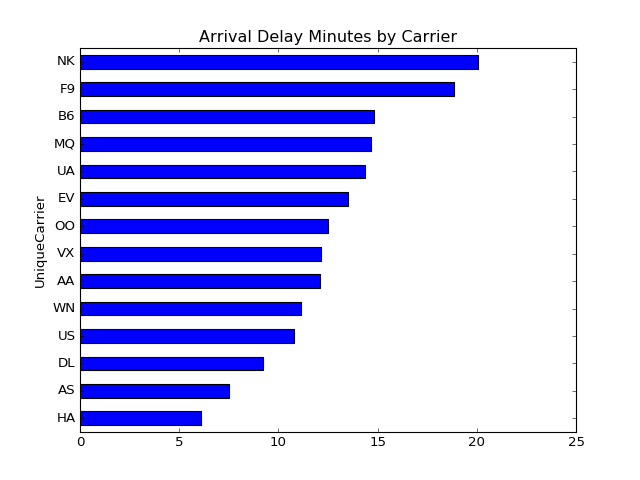

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
# Group data by Carrier
dfbyCarrier = data2015.groupby('UniqueCarrier').mean()
# plot Arrival Delay Minutes by Carrier
dfbyCarrier.sort_values(by='ArrDelayMinutes', ascending=True)['ArrDelayMinutes'].plot(kind='barh',title='Arrival Delay Minutes by Carrier')

<IPython.core.display.Javascript object>


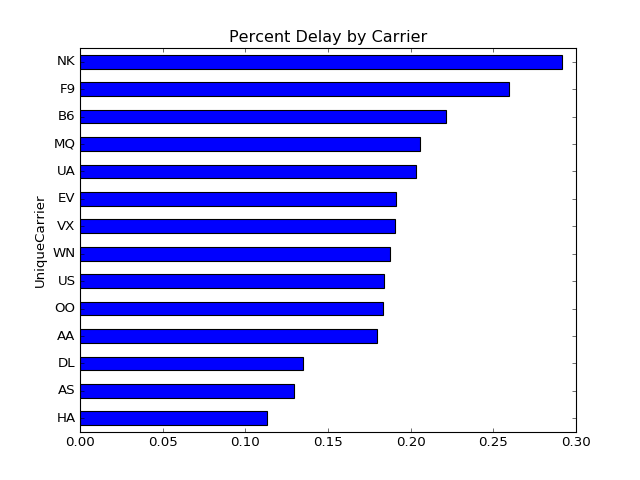

In [12]:
# plot Percent of delay by Carrier
dfbyCarrier['delayCount'] = data2015.groupby('UniqueCarrier')['ArrDel15'].sum()
dfbyCarrier['flightCount'] = data2015.groupby('UniqueCarrier').size()
dfbyCarrier['percentDelay'] = dfbyCarrier['delayCount'].div(dfbyCarrier['flightCount'])
dfbyCarrier.sort_values(by='percentDelay', ascending=True)['percentDelay'].plot(kind='barh',title='Percent Delay by Carrier')